In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
df = pd.read_csv('./DS3/Eartquakes-1990-2023.csv')

In [3]:
# Show basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB
None


In [4]:
# View first few rows
df.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [5]:
print(df.isnull().sum())

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64


In [6]:
# Rename column
df = df.rename(columns={"magnitudo": "magnitude"})

In [7]:
# Drop unnecessary columns
df = df.drop(columns=["place", "status", "tsunami", "significance", "data_type", "state", "time"])

In [8]:
# Fix date format
df['date'] = pd.to_datetime(df['date'], format='mixed')

In [9]:
# Convert date to datetime and extract components
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["hour"] = df["date"].dt.hour
df = df.drop(columns=["date"])

In [10]:
# Create a binary 'significant' column (e.g., magnitude >= 5.0)
df["significant"] = (df["magnitude"] >= 5.0).astype(int)

In [11]:
# Final structure
df.head()

,magnitude,longitude,latitude,depth,year,month,day,hour,significant
0,2.50,-149.669200,61.730200,30.100,1990,1,1,0,0
1,1.41,-155.212333,19.317667,6.585,1990,1,1,0,0
2,1.11,-122.806167,38.821000,3.220,1990,1,1,0,0
3,0.98,-118.846333,37.664333,-0.584,1990,1,1,0,0
4,2.95,-118.934000,34.546000,16.122,1990,1,1,1,0


In [12]:
# Features used for prediction
features = ['latitude', 'longitude', 'depth', 'year', 'month', 'day', 'hour']
X = df[features]

# Labels
y_magnitude = df['magnitude']         # for regression
y_significance = df['significant']    # for classification

In [13]:
from sklearn.model_selection import train_test_split

# For predicting magnitude (regression)
X_train_mag, X_test_mag, y_train_mag, y_test_mag = train_test_split(
    X, y_magnitude, test_size=0.2, random_state=42
)

# For predicting significance (classification)
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(
    X, y_significance, test_size=0.2, random_state=42
)

In [14]:
# Initialize and train the model
reg = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=10)
reg.fit(X_train_mag, y_train_mag)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [15]:
# Initialize and train the model
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_sig, y_train_sig)

RandomForestClassifier(random_state=42)

In [16]:
# Predict on test set
y_pred_mag = reg.predict(X_test_mag)

# Evaluate
mae = mean_absolute_error(y_test_mag, y_pred_mag)
rmse = np.sqrt(mean_squared_error(y_test_mag, y_pred_mag))
r2 = r2_score(y_test_mag, y_pred_mag)

print("🔎 Regression Model Performance:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

🔎 Regression Model Performance:
MAE:  0.4262
RMSE: 0.6134
R²:   0.7751


In [17]:
# Predict on test set
y_pred_sig = clf_model.predict(X_test_sig)

# Evaluate
accuracy = accuracy_score(y_test_sig, y_pred_sig)
conf_matrix = confusion_matrix(y_test_sig, y_pred_sig)
report = classification_report(y_test_sig, y_pred_sig)

print("🔎 Classification Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

🔎 Classification Model Performance:
Accuracy: 0.9843
Confusion Matrix:
 [[677034   1045]
 [  9804   1268]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    678079
           1       0.55      0.11      0.19     11072

    accuracy                           0.98    689151
   macro avg       0.77      0.56      0.59    689151
weighted avg       0.98      0.98      0.98    689151



In [20]:
import joblib

# Save the regression model (Random Forest Regressor)
joblib.dump(reg, 'regression_model.pkl')

# Save the classification model (XGBoost Classifier)
joblib.dump(clf_model, 'classification_model.pkl')

print("Models saved successfully.")


Models saved successfully.


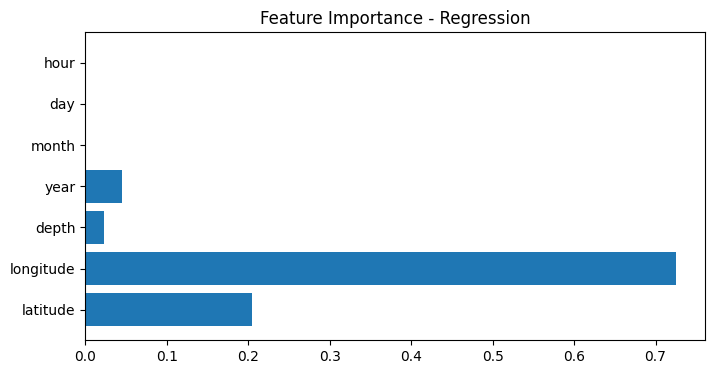

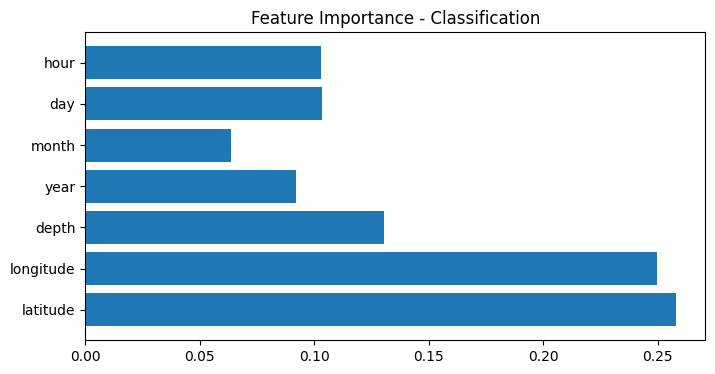

In [21]:
import matplotlib.pyplot as plt

# Feature importance for regression
plt.figure(figsize=(8, 4))
plt.title("Feature Importance - Regression")
plt.barh(features, reg.feature_importances_)
plt.show()

# Feature importance for classification
plt.figure(figsize=(8, 4))
plt.title("Feature Importance - Classification")
plt.barh(features, clf_model.feature_importances_)
plt.show()


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Logistic Regression with balanced class weights
log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train_sig, y_train_sig)

# Predict
y_pred_log = log_model.predict(X_test_sig)

# Evaluate
accuracy = accuracy_score(y_test_sig, y_pred_log)
conf_matrix = confusion_matrix(y_test_sig, y_pred_log)
report = classification_report(y_test_sig, y_pred_log)

print("🔎 Logistic Regression Model Performance:")
print("Accuracy:", round(accuracy, 4))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


🔎 Logistic Regression Model Performance:
Accuracy: 0.8952
Confusion Matrix:
 [[607014  71065]
 [  1174   9898]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.94    678079
           1       0.12      0.89      0.22     11072

    accuracy                           0.90    689151
   macro avg       0.56      0.89      0.58    689151
weighted avg       0.98      0.90      0.93    689151

